<a href="https://colab.research.google.com/github/szywyk/data-analysis-python/blob/main/medical-data-visualizer/medical-data-visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('medical_examination.csv',
                index_col=0)

### Data info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   sex          70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [6]:
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
df.columns

Index(['age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [8]:
df.shape

(70000, 12)

### Add 'overweight' column

In [9]:
df['overweight'] = df['weight'] / (df['height'] / 100) ** 2

### Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

In [10]:
df.loc[df['overweight'] <= 25, 'overweight'] = 0
df.loc[df['overweight'] > 25, 'overweight'] = 1
df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1
df.loc[df['gluc'] == 1, 'gluc'] = 0
df.loc[df['gluc'] > 1, 'gluc'] = 1
df['overweight'] = pd.to_numeric(df['overweight'], downcast='integer')

### Show new head

In [11]:
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


### Function for drawing a categorical plot

In [20]:
def draw_cat_plot():

    # Create DataFrame for cat plot
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    
    # Group and reformat the data to split it by 'cardio'
    df_cat=df_cat.groupby(['cardio'], as_index=False).value_counts().rename(columns={'count': 'total'})

    # Draw the catplot with
    sns.catplot(data=df_cat, kind='bar', x='variable', y='total', hue='value', col='cardio', order=df_cat['variable'].drop_duplicates().sort_values())

### Function for drawing a heat map

In [24]:
def draw_heat_map():
    # Clean the data
    df1 = df.reset_index()
    df_heat = df1.loc[(df1['ap_lo'] <= df1['ap_hi']) & (df1['height'] >= df1['height'].quantile(0.025)) & (df1['height'] <= df1['height'].quantile(0.975)) & (df1['weight'] >= df1['weight'].quantile(0.025)) & (df1['weight'] <= df1['weight'].quantile(0.975))]
    
    # Calculate the correlation matrix
    corr = df_heat.corr()
    
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr))

    # Set up the matplotlib figure
    fig, ax = plt.subplots()

    # Draw the heatmap
    sns.heatmap(corr, annot=True, mask=mask, linewidths=.5, fmt='.1f', annot_kws={'size': 7}, center=0, ax=ax)

### Draw a categorical plot

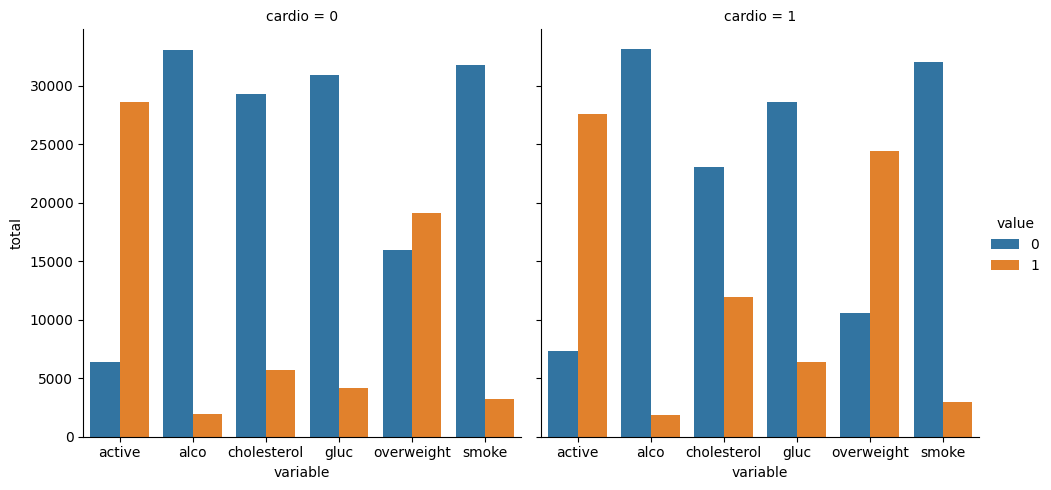

In [21]:
draw_cat_plot()

### Draw a heat map

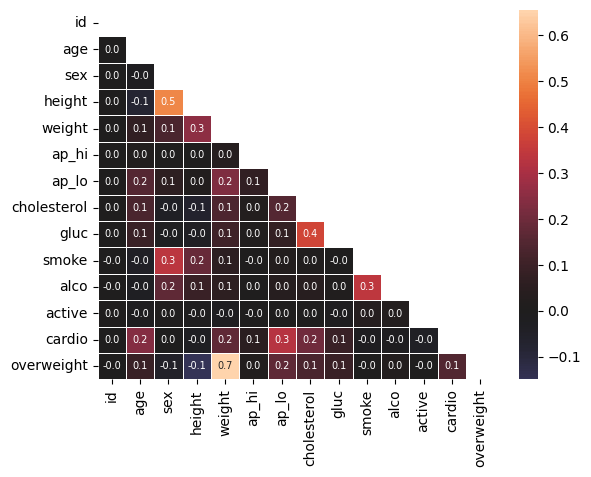

In [25]:
draw_heat_map()